<a href="https://colab.research.google.com/github/jeetukumarmeena/dog-vs-cat-classifier/blob/main/Welcome_To_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/


In [4]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
 99% 1.05G/1.06G [00:13<00:00, 214MB/s]
100% 1.06G/1.06G [00:14<00:00, 81.4MB/s]


In [5]:
import zipfile
zip_ref=zipfile.ZipFile("/content/dogs-vs-cats.zip",'r')
zip_ref.extractall('/content')
zip_ref.close()

In [30]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,MaxPooling2D,Flatten,Conv2D,BatchNormalization,Dropout

In [22]:
#generator

train_ds=keras.utils.image_dataset_from_directory(
   directory='/content/train',

    labels="inferred",
     label_mode="int",
   batch_size =32,
   image_size=(256,256)
 )
validation_ds=keras.utils.image_dataset_from_directory(
   directory='/content/test',

    labels="inferred",
     label_mode="int",
   batch_size =32,
   image_size=(256,256)
 )

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [23]:
#nomalize
def process(image,label):
  image=tf.cast(image/255.,tf.float32)
  return image,label
train_ds=train_ds.map(process)
validation_ds=validation_ds.map(process)


In [32]:
#create cnn model
model= Sequential()
model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid') )
model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))
model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [33]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)                   │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 254, 254, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 125, 125, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 125, 125, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_12 (Conv2D)                   │ (None, 60, 60, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 60, 60, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 30, 30, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 115200)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 128)                 │      14,745,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,848,193 (56.64 MB)

 Trainable params: 14,847,745 (56.64 MB)

 Non-trainable params: 448 (1.75 KB)

In [34]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [35]:
history=model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 60s 85ms/step - accuracy: 0.5561 - loss: 3.5839 - val_accuracy: 0.6422 - val_loss: 0.6200
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 53s 85ms/step - accuracy: 0.6486 - loss: 0.6281 - val_accuracy: 0.7324 - val_loss: 0.5294
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 53s 84ms/step - accuracy: 0.7277 - loss: 0.5462 - val_accuracy: 0.6714 - val_loss: 0.6016
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 54s 86ms/step - accuracy: 0.7838 - loss: 0.4679 - val_accuracy: 0.7828 - val_loss: 0.4596
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 54s 86ms/step - accuracy: 0.8166 - loss: 0.4090 - val_accuracy: 0.7614 - val_loss: 0.4853
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 51s 81ms/step - accuracy: 0.8506 - loss: 0.3413 - val_accuracy: 0.7888 - val_loss: 0.4847
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 50s 79ms/step - accuracy: 0.8813 - loss: 0.2814 - val_accuracy: 0.7914 - val_loss: 0.5031
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 50s 80ms/step - accuracy: 0.9240 - loss: 0.1936 - 

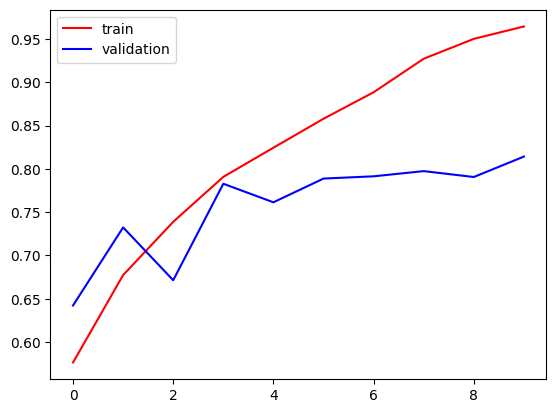

In [36]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history["val_accuracy"],color='blue',label='validation')
plt.legend()
plt.show()


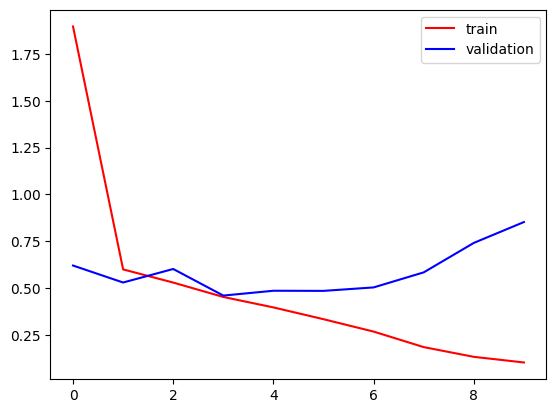

In [37]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label="validation")
plt.legend()
plt.show()

In [ ]:
#ways to reduce overfitting
#add more data
# data augmentation
# l1, l2 regularizer
#dropout
#Batch form
#Reduce Complexity

In [41]:
import cv2

In [66]:
test_img=cv2.imread("/content/cat.jpg")

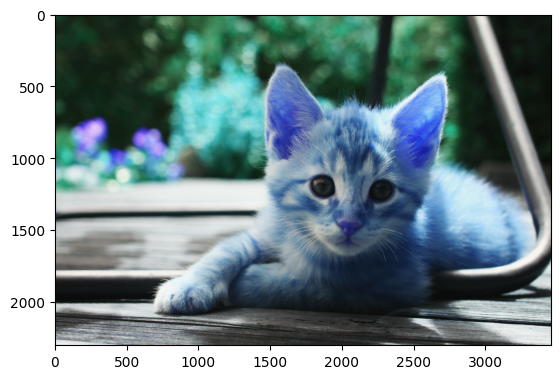

In [67]:
plt.imshow(test_img)


In [68]:
test_img.shape

(2304, 3456, 3)

In [69]:
test_img =cv2.resize(test_img,(256,256))

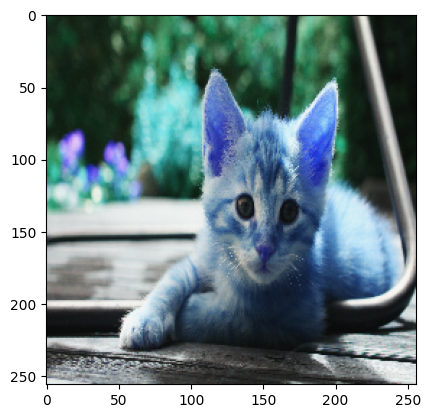

In [70]:
plt.imshow(test_img)

In [71]:
test_input =test_img.reshape((1,256,256,3))

In [72]:
model.predict(test_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


array([[0.]], dtype=float32)